Decision TRee : it is a tree based classifier which is nothing but if - else structures.

In [1]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz

In [2]:
#pip install graphviz

In [3]:
df=sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
df["species"]=df["species"].replace({"setosa":0,"versicolor":1,"virginica":2})

In [9]:
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
x=df.drop(columns="species")
y=df["species"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [12]:
print(x_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [13]:
print(x_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [14]:
dtc=DecisionTreeClassifier()

In [15]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=dtc.predict(x_test)

In [17]:
y_pred

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0], dtype=int64)

In [18]:
## Model Evaluation

In [19]:
ac=accuracy_score(y_test,y_pred)
ac

0.9473684210526315

In [20]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 13]], dtype=int64)

In [21]:
## F_1 Score
f1_score(y_test,y_pred,average="weighted")

0.9481203007518798

In [22]:
## Accuracy On Training
y_pred_train=dtc.predict(x_train)

In [23]:
accuracy_score(y_train,y_pred_train)

1.0

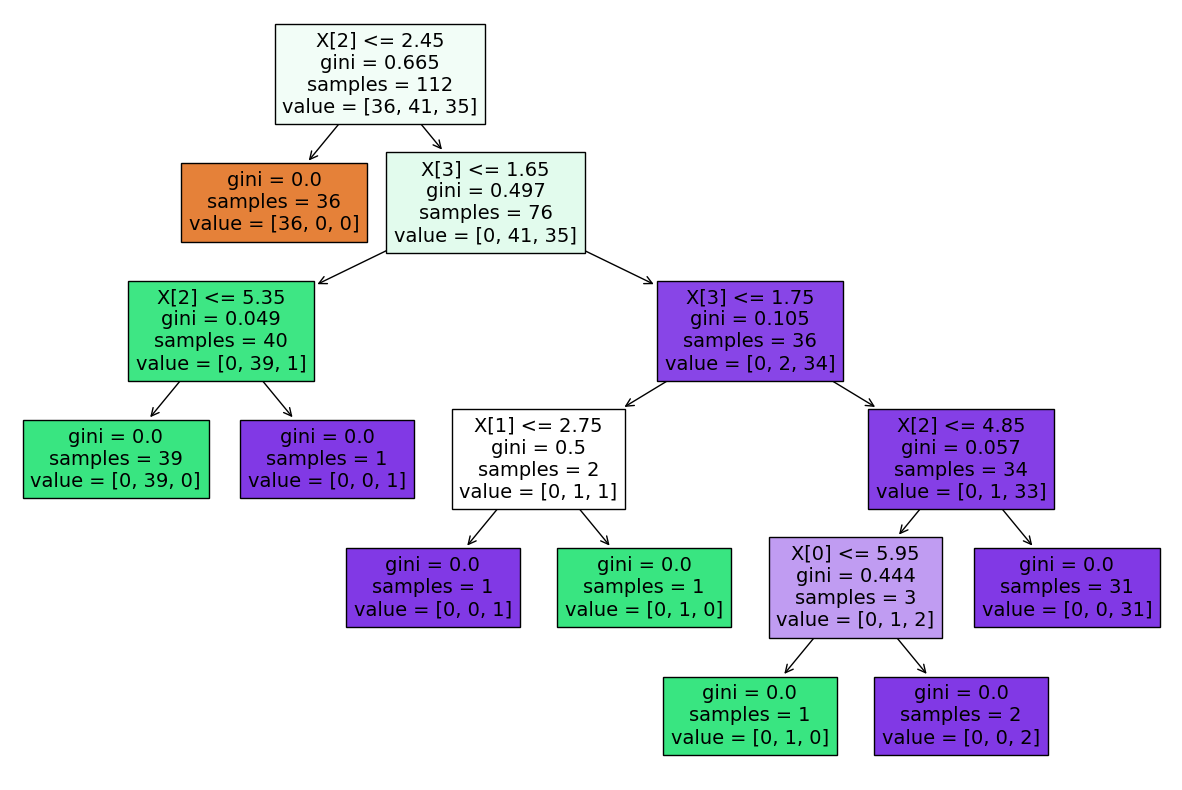

In [24]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()


In [25]:
## Changing Our Hyper PArametric Test Values

In [26]:
## 1. Max_depth

In [27]:
dtc_u=DecisionTreeClassifier(max_depth=1)
dtc_u.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [28]:
y_pred_u=dtc_u.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred_u)

0.6052631578947368

In [30]:
y_pred_u_train=dtc_u.predict(x_train)

In [31]:
accuracy_score(y_train,y_pred_u_train)

0.6875

In [32]:
## Checking Our Tree

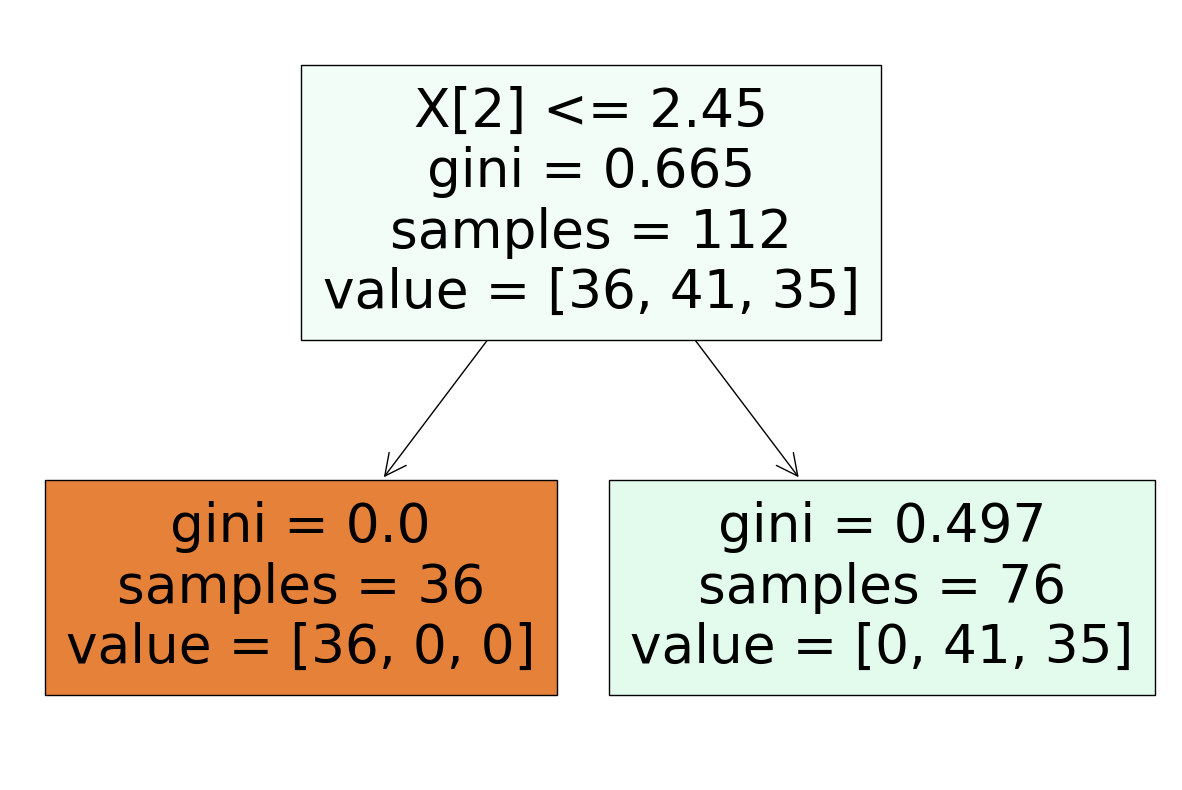

In [33]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_u,filled=True)
plt.show()

In [34]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
}

In [35]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)


In [36]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [37]:
grid_search.best_score_

0.990909090909091

In [38]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'random'}


In [39]:
#max_depth =5, min_samples_leaf= 3,min_samples_split= 4, splitter ='random')
#treemodel.fit(x_train,y_train)


In [40]:
treemodel=DecisionTreeClassifier(criterion= 'gini',max_depth= 8,min_samples_leaf= 8,min_samples_split= 4,splitter= 'random')

In [41]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=4,
                       splitter='random')

In [42]:
y_pred=treemodel.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred)

0.868421052631579

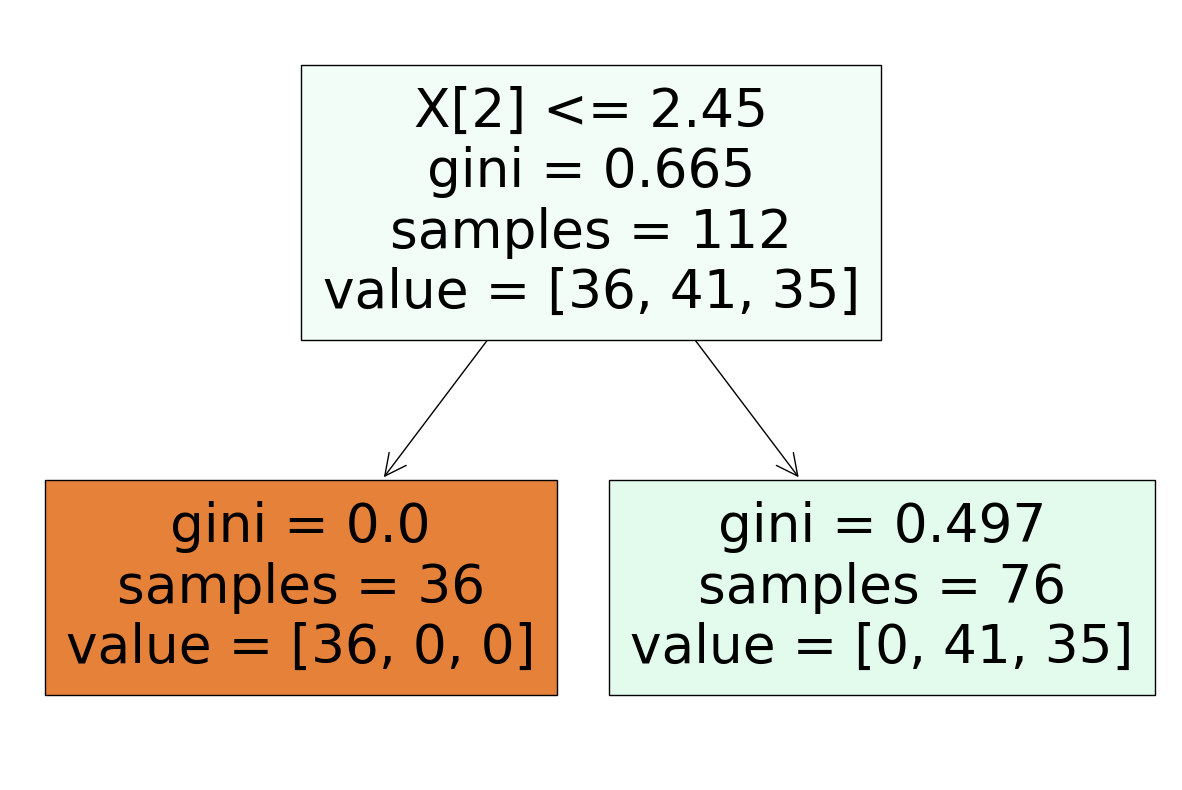

In [44]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc_u,filled=True)
plt.show()